# intro  - open dataset

In [52]:
import pandas as pd

In [53]:
data = pd.read_csv('vocabolari/vocabolario_60k.txt', sep='\n', header=None, names=['words'])

In [54]:
#put all words in lowercase
data['words'] = data['words'].str.upper()

In [55]:
data.head()

,words
0,A
1,ABATE
2,ABATI
3,ABBAGLI
4,ABBAGLIA


In [56]:
data.describe()

,words
count,60453
unique,60444
top,SAL
freq,2


In [57]:
data['len'] = data['words'].apply(lambda x: len(x))
data.head()

,words,len
0,A,1
1,ABATE,5
2,ABATI,5
3,ABBAGLI,7
4,ABBAGLIA,8


In [58]:
# data_by_len = 
data.groupby('len').count()

,words
len,
1,26
2,44
3,172
4,931
5,2741
6,4777
7,8642
8,12018
9,14864


### random stuff

In [59]:
data_by_len = [data[data['len']==i] for i in range(1, 20)]
len(data_by_len)

amounts = []

for i in range(1, 20):
    amounts.append(data_by_len[i-1].count()[0])
    # print(i, "->", data_by_len[i-1].count()[0])
# data_by_len[4].count()[0]

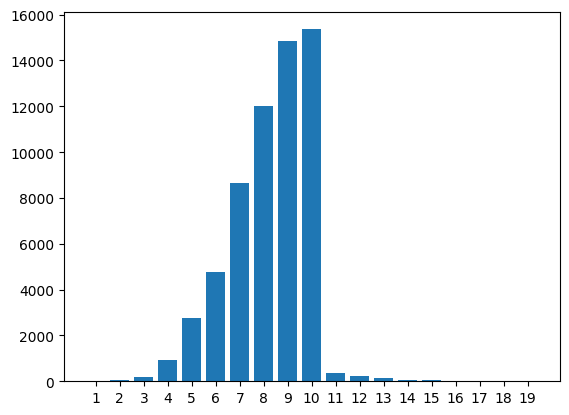

In [60]:
import matplotlib.pyplot as plt

# plot histograms of words amoount 
plt.bar(range(1, 20), amounts)
plt.xticks(range(1, 20))
# plt.xlabel = "length"
# plt.ylabel = "amount"

plt.show()

In [61]:
# import regex library and create and apply a pattern to filter all verbs in the infinite form
import re
pattern = re.compile("^.*[AEI]RE$")
d2  = data[data['words'].str.contains(pattern)]
d2.head()


,words,len
8,ABBAGLIARE,10
27,ABBAIARE,8
61,ABBASSARE,9
91,ABBATTERE,9
124,ABBELLIRE,9


### optimization

only taking 6 letters for now

In [62]:
# only 6 letters words
words6 = data[data['len']==6]
words6['words'].describe()

count       4777
unique      4776
top       PARERI
freq           2
Name: words, dtype: object

In [63]:
#save words6['words'] as a csv file
words6['words'].to_csv('words6.csv', index=False, header=False)